In [154]:
import numpy as np
import pandas as pd  # for data analytics

# The two packages below are for plotting
import seaborn as sns  #seaborn has nice features. Need to load pyplot with seaborn at the same time
import matplotlib.pyplot as plt
%matplotlib inline

import re

In [155]:
df = pd.read_csv('national_clean_des_xstreet_above_3.csv')

In [156]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_rows", None)
df.head()

,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Street,Description,Cross_street
0,0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,NaN,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,OUTERBELT E,BETWEEN SAWMILL RD/EXIT 20 AND OH-315/OLENTANGY RIV RD/EXIT 22 - ACCIDENT.,SAWMILL RD
1,1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,NaN,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,I-70 E,AT OH-4/OH-235/EXIT 41 - ACCIDENT.,OH-4
2,2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,NaN,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day,I-75 S,AT I-71/US-50/EXIT 1 - ACCIDENT.,I-71
3,3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,NaN,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,I-77 N,AT DART AVE/EXIT 21 - ACCIDENT.,DART AVE
4,4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,NaN,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,I-75 S,AT MITCHELL AVE/EXIT 6 - ACCIDENT.,MITCHELL AVE


In [157]:
df.shape

(1329105, 49)

In [158]:
df = df.drop_duplicates()

In [159]:
df.shape

(1329105, 49)

## Drop columns with no use and duplicates

In [160]:
# Check correlation between Sunrise_Sunset, Civil_Twilight
crosstab = pd.crosstab(index = df['Sunrise_Sunset'], columns = df['Civil_Twilight'])
print(crosstab)

Civil_Twilight     Day   Night
Sunrise_Sunset                
Day             930062      15
Night            57826  340790


In [161]:
df2 = df.drop(columns = ['ID','Description','Start_Lat','End_Lat','Start_Lng',
                        'End_Lng','End_Time','Distance(mi)','Number','Side','County','Zipcode','Country',
                        'Timezone','Airport_Code','Civil_Twilight','Nautical_Twilight',
                        'Astronomical_Twilight'], axis = 1)

In [162]:
df2 = df2.drop(df2.columns[0], axis = 1)

In [163]:
df2 = df2.drop_duplicates()

In [164]:
df2.head()

,Severity,Start_Time,City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Street,Cross_street
0,3,2016-02-08 00:37:08,Dublin,OH,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,OUTERBELT E,SAWMILL RD
1,2,2016-02-08 05:56:20,Dayton,OH,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,I-70 E,OH-4
2,2,2016-02-08 06:15:39,Cincinnati,OH,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,I-75 S,I-71
3,2,2016-02-08 06:51:45,Akron,OH,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,I-77 N,DART AVE
4,3,2016-02-08 07:53:43,Cincinnati,OH,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,I-75 S,MITCHELL AVE


In [165]:
df2.shape

(1222844, 30)

## Change column names so they are more callable 

In [166]:
df2 = df2.rename(columns = {'Temperature(F)':'Temp_F', 'Wind_Chill(F)': 'Wind_Chill_F',
                            'Humidity(%)':'Humidity_percent', 'Pressure(in)':'Pressure_in',
                            'Visibility(mi)':'Visibility_mi','Wind_Speed(mph)':'Wind_Speed_mph',
                            'Precipitation(in)':'Precipitation_in'})

## Remove accident time and weather timestamp difference > 3 hours

In [167]:
df2['Start_Time'] = pd.to_datetime(df2['Start_Time'])
df2['Weather_Timestamp'] = pd.to_datetime(df2['Weather_Timestamp'])

In [168]:
# Remove weather timestamp with > 3 hours time difference from Start_Time
df2['time_diff'] = (abs(df2['Start_Time'] - df2['Weather_Timestamp']).astype('timedelta64[h]') < 3)

df2 = df2[df2.time_diff == True]
df2.head(5)
df2 = df2.drop(columns = ['time_diff'], axis = 1)

In [169]:
print(df2.shape)
df2.head(5)

(1195387, 30)


,Severity,Start_Time,City,State,Weather_Timestamp,Temp_F,Wind_Chill_F,Humidity_percent,Pressure_in,Visibility_mi,Wind_Direction,Wind_Speed_mph,Precipitation_in,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Street,Cross_street
0,3,2016-02-08 00:37:08,Dublin,OH,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,OUTERBELT E,SAWMILL RD
1,2,2016-02-08 05:56:20,Dayton,OH,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,I-70 E,OH-4
2,2,2016-02-08 06:15:39,Cincinnati,OH,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,I-75 S,I-71
3,2,2016-02-08 06:51:45,Akron,OH,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,I-77 N,DART AVE
4,3,2016-02-08 07:53:43,Cincinnati,OH,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,I-75 S,MITCHELL AVE


## Parse Weather_Condition into new columns for selected weather condition

In [170]:
df2.Weather_Condition.value_counts()

Fair                                   373874
Mostly Cloudy                          163411
Clear                                  139238
Cloudy                                 117838
Partly Cloudy                          115291
Overcast                                69128
Light Rain                              59471
Scattered Clouds                        37299
Light Snow                              17627
Haze                                    16291
Rain                                    14858
Fog                                     12864
Fair / Windy                             5675
Heavy Rain                               5538
Light Drizzle                            3149
Mostly Cloudy / Windy                    2578
Smoke                                    2573
Thunder in the Vicinity                  2424
Cloudy / Windy                           2401
Snow                                     2335
T-Storm                                  2118
Thunder                           

In [171]:
df2.Weather_Condition.describe()

count     1184957
unique        114
top          Fair
freq       373874
Name: Weather_Condition, dtype: object

In [172]:
df2['Weather_Condition'].isnull().values.sum()/df2.Weather_Condition.shape

array([0.00872521])

In [173]:
# Remove Weather_Condition = na
df2 = df2[df2['Weather_Condition'].notna()]

In [174]:
df2['Weather_Condition'].isnull().values.sum()

0

In [175]:
df2.shape

(1184957, 30)

In [176]:
# Collect weather conditions in a list
weather_condition_ls = []
for condition in df2['Weather_Condition']:
    condition = re.split(' AND |IN THE VICINITY| WITH | / ', condition.upper().strip())
    #print(condition)
    for item in condition:
        weather_condition_ls.append(item.strip())
#print(weather_condition_ls[0:10])
#print(len(weather_condition_ls))

In [177]:
df_weather = pd.DataFrame (weather_condition_ls, columns = ['Weather_Condition'])
df_weather.value_counts()

Weather_Condition     
FAIR                      379549
MOSTLY CLOUDY             165989
CLEAR                     139238
CLOUDY                    120239
PARTLY CLOUDY             116896
OVERCAST                   69128
LIGHT RAIN                 62643
SCATTERED CLOUDS           37299
LIGHT SNOW                 18315
RAIN                       17095
HAZE                       16501
WINDY                      15894
FOG                        12988
THUNDER                     6530
HEAVY RAIN                  5782
LIGHT DRIZZLE               3191
                            2684
SMOKE                       2595
SNOW                        2493
T-STORM                     2211
HEAVY T-STORM               1288
LIGHT THUNDERSTORMS          948
WINTRY MIX                   941
DRIZZLE                      881
THUNDERSTORM                 795
HEAVY SNOW                   673
LIGHT FREEZING RAIN          604
MIST                         491
HEAVY THUNDERSTORMS          435
PATCHES OF FOG      

In [178]:
# Collect unique weather conditions
unique_weather_conditions = set(weather_condition_ls)
while("" in unique_weather_conditions):
    unique_weather_conditions.remove("")
print(unique_weather_conditions)

{'TORNADO', 'HAIL', 'LIGHT SLEET', 'DUSTSTORM', 'WINDY', 'LIGHT RAIN', 'HEAVY FREEZING DRIZZLE', 'PATCHES OF FOG', 'LIGHT DRIZZLE', 'LIGHT FREEZING FOG', 'BLOWING SNOW', 'WINTRY MIX', 'WIDESPREAD DUST', 'LIGHT SNOW', 'T-STORM', 'PARTLY CLOUDY', 'SCATTERED CLOUDS', 'LIGHT FREEZING RAIN', 'SMALL HAIL', 'SHOWERS', 'FREEZING RAIN', 'DUST WHIRLWINDS', 'RAIN SHOWER', 'LIGHT BLOWING SNOW', 'HAZE', 'HEAVY ICE PELLETS', 'MOSTLY CLOUDY', 'THUNDER', 'LIGHT SNOW SHOWERS', 'LIGHT RAIN SHOWERS', 'FOG', 'HEAVY THUNDERSTORMS', 'FUNNEL CLOUD', 'CLOUDY', 'DRIZZLE', 'HEAVY SLEET', 'RAIN SHOWERS', 'OVERCAST', 'SHALLOW FOG', 'PARTIAL FOG', 'DUST WHIRLS NEARBY', 'LIGHT FOG', 'SLEET', 'THUNDERSTORM', 'LIGHT RAIN SHOWER', 'CLEAR', 'VOLCANIC ASH', 'THUNDERSTORMS', 'HEAVY BLOWING SNOW', 'HEAVY RAIN SHOWER', 'N/A PRECIPITATION', 'SNOW', 'HEAVY RAIN', 'LOW DRIFTING SNOW', 'LIGHT ICE PELLETS', 'LIGHT THUNDERSTORMS', 'SMOKE', 'MIST', 'HEAVY SNOW', 'BLOWING DUST', 'SQUALLS', 'LIGHT HAZE', 'LIGHT SNOW SHOWER', 'FAIR'

In [179]:
## Manually sort weather conditions into categories:
# cloudy: binary, 0 for no cloud, 1 for cloudy
# rain: ordinal, 0 for no rain, 1 for light rain, 2 for medium rain, 3 for heavy rain
# fog: binary, 0 for no fog, 1 for fog
# thunder: binary, 0 for no thunder, 1 for thunder
# windy: binary, 0 for no wind, 1 for windy
# snow: binary, 0 for no snow, 1 for snow
# sleet: ordinal, 0 for no sleet, 1 for light sleet, 2 for medium sleet, 3 for heavy sleet
# dust: binary, 0 for no dust, 1 for dust
# tornado: binary, 0 for no tornado, 1 for tornado
# hail: binary, 0 for no hail, 1 for hail

In [180]:
cloudy = []
rain = []
fog = []
thunder = []
windy = []
snow = []
sleet = []
dust =[]
tornado = []
hail = []

cloud_condition = ['MOSTLY CLOUDY','CLOUDY','PARTLY CLOUDY','OVERCAST','SCATTERED CLOUDS']
lightrain_condition = ['LIGHT RAIN','LIGHT DRIZZLE','DRIZZLE','LIGHT RAIN SHOWER','LIGHT RAIN SHOWERS',
                    'HEAVY DRIZZLE']
rain_condition = ['RAIN','RAIN SHOWERS','SHOWERS','RAIN SHOWER']
heavyrain_condition = ['HEAVY RAIN','HEAVY RAIN SHOWERS','HEAVY RAIN SHOWER']
fog_condition = ['HAZE','LIGHT HAZE','FOG','LIGHT FOG','MIST','PATCHES OF FOG',
                    'SHALLOW FOG','LIGHT FREEZING FOG','PARTIAL FOG','SMOKE']
thunder_condition = ['THUNDER','T-STORM','HEAVY T-STORM','LIGHT THUNDERSTORMS','HEAVY THUNDERSTORMS',
                    'THUNDERSTORMS','THUNDERSTORM']
wind_condition = ['WINDY','SQUALLS']
snow_condition = ['SNOW','LIGHT SNOW','LIGHT SNOW SHOWER','HEAVY BLOWING SNOW','LOW DRIFTING SNOW',
                    'LIGHT BLOWING SNOW','HEAVY SNOW','BLOWING SNOW','LIGHT SNOW SHOWERS','SNOW GRAINS']
lightsleet_condition = ['LIGHT FREEZING RAIN','LIGHT FREEZING DRIZZLE','LIGHT SLEET','LIGHT ICE PELLETS']
sleet_condition = ['WINTRY MIX','FREEZING RAIN','ICE PELLETS','SLEET']
heavysleet_condition = ['HEAVY FREEZING DRIZZLE','HEAVY SLEET','HEAVY ICE PELLETS']
dust_condition = ['BLOWING DUST','WIDESPREAD DUST','DUST WHIRLWINDS','VOLCANIC ASH',
                  'DUST WHIRLS NEARBY','DUST WHIRLS','SAND','DUSTSTORM']
tornado_condition = ['TORNADO','FUNNEL CLOUD']
hail_condition = ['HAIL','SMALL HAIL']

for condition in df2['Weather_Condition']:
    condition = re.split(' AND |IN THE VICINITY| WITH | / ', condition.upper().strip())
    #print(condition)
    while("" in condition):
        condition.remove("")
    
    if any(item.strip() in condition for item in cloud_condition):
        cloudy.append(1)
    else:
        cloudy.append(0)
        
    if any(item.strip() in condition for item in lightrain_condition):
        rain.append(1)
    elif any(item.strip() in condition for item in rain_condition):
        rain.append(2)
    elif any(item.strip() in condition for item in heavyrain_condition):
        rain.append(3)
    else:
        rain.append(0)
        
    if any(item.strip() in condition for item in fog_condition):
        fog.append(1)
    else:
        fog.append(0)
        
    if any(item.strip() in condition for item in thunder_condition):
        thunder.append(1)
    else:
        thunder.append(0)
        
    if any(item.strip() in condition for item in wind_condition):
        windy.append(1)
    else:
        windy.append(0)
         
    if any(item.strip() in condition for item in snow_condition):
        snow.append(1) 
    else:
        snow.append(0)
                
    if any(item.strip() in condition for item in lightsleet_condition):
        sleet.append(1)
    elif any(item.strip() in condition for item in sleet_condition):
        sleet.append(2)
    elif any(item.strip() in condition for item in heavysleet_condition):
        sleet.append(3)
    else:
        sleet.append(0)
            
    if any(item.strip() in condition for item in dust_condition):     
        dust.append(1)
    else:
        dust.append(0)
      
    if any(item.strip() in condition for item in tornado_condition):     
        tornado.append(1)
    else:
        tornado.append(0)
            
    if any(item.strip() in condition for item in hail_condition):       
        hail.append(1)
    else:
        hail.append(0)
    

In [181]:
print(len(cloudy))
print(len(rain))
print(len(fog))
print(len(thunder))
print(len(windy))
print(len(snow))
print(len(sleet))
print(len(dust))
print(len(tornado))
print(len(hail))

1184957
1184957
1184957
1184957
1184957
1184957
1184957
1184957
1184957
1184957


In [182]:
# Add new columns to dataframe
df2['CLOUDY'] = cloudy
df2['RAIN'] = rain
df2['FOG'] = fog
df2['THUNDER'] = thunder
df2['WINDY'] = windy
df2['SNOW']= snow
df2['SLEET'] = sleet
df2['DUST'] = dust
df2['TORNADO'] = tornado
df2['HAIL'] = hail

In [183]:
df2.head(5)

,Severity,Start_Time,City,State,Weather_Timestamp,Temp_F,Wind_Chill_F,Humidity_percent,Pressure_in,Visibility_mi,Wind_Direction,Wind_Speed_mph,Precipitation_in,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Street,Cross_street,CLOUDY,RAIN,FOG,THUNDER,WINDY,SNOW,SLEET,DUST,TORNADO,HAIL
0,3,2016-02-08 00:37:08,Dublin,OH,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,OUTERBELT E,SAWMILL RD,0,1,0,0,0,0,0,0,0,0
1,2,2016-02-08 05:56:20,Dayton,OH,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,I-70 E,OH-4,0,1,0,0,0,0,0,0,0,0
2,2,2016-02-08 06:15:39,Cincinnati,OH,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,I-75 S,I-71,1,0,0,0,0,0,0,0,0,0
3,2,2016-02-08 06:51:45,Akron,OH,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,I-77 N,DART AVE,1,0,0,0,0,0,0,0,0,0
4,3,2016-02-08 07:53:43,Cincinnati,OH,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,I-75 S,MITCHELL AVE,0,1,0,0,0,0,0,0,0,0


In [184]:
df2 = df2.drop(columns = ['Weather_Condition'], axis = 1)

In [185]:
df2.head(5)

,Severity,Start_Time,City,State,Weather_Timestamp,Temp_F,Wind_Chill_F,Humidity_percent,Pressure_in,Visibility_mi,Wind_Direction,Wind_Speed_mph,Precipitation_in,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Street,Cross_street,CLOUDY,RAIN,FOG,THUNDER,WINDY,SNOW,SLEET,DUST,TORNADO,HAIL
0,3,2016-02-08 00:37:08,Dublin,OH,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,OUTERBELT E,SAWMILL RD,0,1,0,0,0,0,0,0,0,0
1,2,2016-02-08 05:56:20,Dayton,OH,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,I-70 E,OH-4,0,1,0,0,0,0,0,0,0,0
2,2,2016-02-08 06:15:39,Cincinnati,OH,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,I-75 S,I-71,1,0,0,0,0,0,0,0,0,0
3,2,2016-02-08 06:51:45,Akron,OH,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,I-77 N,DART AVE,1,0,0,0,0,0,0,0,0,0
4,3,2016-02-08 07:53:43,Cincinnati,OH,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,I-75 S,MITCHELL AVE,0,1,0,0,0,0,0,0,0,0


## Sort timestamp to non_workday and workday

In [186]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
holiday_list = cal.holidays(start=df2['Start_Time'].min(), end=df2['Start_Time'].max())
h_list = []
for item in holiday_list:
    h_list.append(str(item.date()))

holiday_or_weekend = []
workday = []

for time in df2['Start_Time']:
    if str(time.date()) in h_list or time.weekday() > 5:
        holiday_or_weekend.append(1)
        workday.append(0)
    else:
        holiday_or_weekend.append(0)
        workday.append(1)

In [187]:
df2['Non_workday'] = holiday_or_weekend
df2['Work_day'] = workday

In [188]:
df2.head()

,Severity,Start_Time,City,State,Weather_Timestamp,Temp_F,Wind_Chill_F,Humidity_percent,Pressure_in,Visibility_mi,Wind_Direction,Wind_Speed_mph,Precipitation_in,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Street,Cross_street,CLOUDY,RAIN,FOG,THUNDER,WINDY,SNOW,SLEET,DUST,TORNADO,HAIL,Non_workday,Work_day
0,3,2016-02-08 00:37:08,Dublin,OH,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,OUTERBELT E,SAWMILL RD,0,1,0,0,0,0,0,0,0,0,0,1
1,2,2016-02-08 05:56:20,Dayton,OH,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,I-70 E,OH-4,0,1,0,0,0,0,0,0,0,0,0,1
2,2,2016-02-08 06:15:39,Cincinnati,OH,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,I-75 S,I-71,1,0,0,0,0,0,0,0,0,0,0,1
3,2,2016-02-08 06:51:45,Akron,OH,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,I-77 N,DART AVE,1,0,0,0,0,0,0,0,0,0,0,1
4,3,2016-02-08 07:53:43,Cincinnati,OH,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,I-75 S,MITCHELL AVE,0,1,0,0,0,0,0,0,0,0,0,1


## Sort workday to rush_hour and non_rush hour 

In [189]:
from datetime import datetime

time1 = '07::00::00'
start_morning = datetime.strptime(time1, '%H::%M::%S').time()
print(start_morning)

time2 = '09::00::00'
end_morning = datetime.strptime(time2, '%H::%M::%S').time()

time3 = '16::00::00'
start_evening = datetime.strptime(time1, '%H::%M::%S').time()

time4 = '18::00::00'
end_evening = datetime.strptime(time2, '%H::%M::%S').time()

07:00:00


In [190]:
rushhr = []

for time in df2['Start_Time']:
    time = time.time()
    if (time >= start_morning and time <= end_morning) or (time >= start_evening and time <= end_evening):
        rushhr.append(1)
        #print(time)
    else:
        rushhr.append(0)

print(rushhr[0:50])
len(rushhr)

[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]


1184957

In [191]:
df2['Rush_hour'] = rushhr

In [192]:
df2.loc[df2['Non_workday'] == 1, 'Rush_hour'] = 0   # modify 'Rush_hour', when it is non_workday set to 0

## Standardize symbols for 'Wind_Direction' 

In [193]:
df2.Wind_Direction.value_counts()

CALM        142185
WNW          64833
W            64059
NW           61582
Calm         61022
SSW          60031
WSW          59994
S            57346
SW           57092
SSE          52954
NNW          52843
SE           46312
ESE          43008
E            42092
N            39465
VAR          39381
ENE          38826
NE           36035
NNE          34300
West         31850
South        31774
North        24082
East         19184
Variable     17934
Name: Wind_Direction, dtype: int64

In [194]:
df2.loc[df2['Wind_Direction'] == 'South', 'Wind_Direction'] = 'S'
df2.loc[df2['Wind_Direction'] == 'North', 'Wind_Direction'] = 'N'
df2.loc[df2['Wind_Direction'] == 'East', 'Wind_Direction'] = 'E'
df2.loc[df2['Wind_Direction'] == 'West', 'Wind_Direction'] = 'W'
df2.loc[df2['Wind_Direction'] == 'Variable', 'Wind_Direction'] = 'VAR'
df2.loc[df2['Wind_Direction'] == 'Calm', 'Wind_Direction'] = 'CALM'

In [195]:
df2.Wind_Direction.value_counts()

CALM    203207
W        95909
S        89120
WNW      64833
N        63547
NW       61582
E        61276
SSW      60031
WSW      59994
VAR      57315
SW       57092
SSE      52954
NNW      52843
SE       46312
ESE      43008
ENE      38826
NE       36035
NNE      34300
Name: Wind_Direction, dtype: int64

In [196]:
df2.head()

,Severity,Start_Time,City,State,Weather_Timestamp,Temp_F,Wind_Chill_F,Humidity_percent,Pressure_in,Visibility_mi,Wind_Direction,Wind_Speed_mph,Precipitation_in,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Street,Cross_street,CLOUDY,RAIN,FOG,THUNDER,WINDY,SNOW,SLEET,DUST,TORNADO,HAIL,Non_workday,Work_day,Rush_hour
0,3,2016-02-08 00:37:08,Dublin,OH,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,OUTERBELT E,SAWMILL RD,0,1,0,0,0,0,0,0,0,0,0,1,0
1,2,2016-02-08 05:56:20,Dayton,OH,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,CALM,NaN,0.02,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,I-70 E,OH-4,0,1,0,0,0,0,0,0,0,0,0,1,0
2,2,2016-02-08 06:15:39,Cincinnati,OH,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,CALM,NaN,0.02,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,I-75 S,I-71,1,0,0,0,0,0,0,0,0,0,0,1,0
3,2,2016-02-08 06:51:45,Akron,OH,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,CALM,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,I-77 N,DART AVE,1,0,0,0,0,0,0,0,0,0,0,1,0
4,3,2016-02-08 07:53:43,Cincinnati,OH,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,I-75 S,MITCHELL AVE,0,1,0,0,0,0,0,0,0,0,0,1,1


## Check all numerical attributes for correlation

                    Temp_F  Wind_Chill_F  Humidity_percent  Pressure_in  \
Temp_F            1.000000      0.993952         -0.393716     0.063583   
Wind_Chill_F      0.993952      1.000000         -0.383668     0.037389   
Humidity_percent -0.393716     -0.383668          1.000000     0.143357   
Pressure_in       0.063583      0.037389          0.143357     1.000000   
Visibility_mi     0.201898      0.214096         -0.363024     0.004873   
Wind_Speed_mph    0.051937     -0.022362         -0.149750    -0.011774   
Precipitation_in -0.012460     -0.023457          0.076719     0.020183   

                  Visibility_mi  Wind_Speed_mph  Precipitation_in  
Temp_F                 0.201898        0.051937         -0.012460  
Wind_Chill_F           0.214096       -0.022362         -0.023457  
Humidity_percent      -0.363024       -0.149750          0.076719  
Pressure_in            0.004873       -0.011774          0.020183  
Visibility_mi          1.000000        0.030686         -0.

<AxesSubplot:>

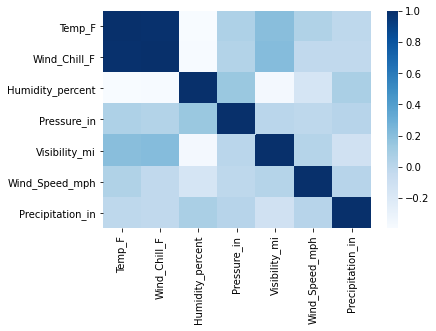

In [197]:
num_var = ['Temp_F','Wind_Chill_F','Humidity_percent','Pressure_in','Visibility_mi',
           'Wind_Speed_mph','Precipitation_in']
num_corr = df2[num_var].corr()
print(num_corr)
sns.heatmap(num_corr,cmap="Blues")

# Temp_F and Wind_Chill_F highly correlatd, choose one

## Check missing value for each column 

In [198]:
colnames = df2.columns

for col in df2.columns:
    print('% missing data in column '+col+': ' 
          + str(df2[col].isnull().values.sum()/len(df2)*100))


#df2['Weather_Condition'].isnull().values.sum()/df2.Weather_Condition.shape

% missing data in column Severity: 0.0
% missing data in column Start_Time: 0.0
% missing data in column City: 0.007257647323911332
% missing data in column State: 0.0
% missing data in column Weather_Timestamp: 0.0
% missing data in column Temp_F: 0.42347528222543096
% missing data in column Wind_Chill_F: 26.992540657593484
% missing data in column Humidity_percent: 0.5388381181764401
% missing data in column Pressure_in: 0.1384860378899825
% missing data in column Visibility_mi: 0.22886906444706434
% missing data in column Wind_Direction: 0.5715819223819936
% missing data in column Wind_Speed_mph: 5.904264880497774
% missing data in column Precipitation_in: 31.176996296068126
% missing data in column Amenity: 0.0
% missing data in column Bump: 0.0
% missing data in column Crossing: 0.0
% missing data in column Give_Way: 0.0
% missing data in column Junction: 0.0
% missing data in column No_Exit: 0.0
% missing data in column Railway: 0.0
% missing data in column Roundabout: 0.0
% miss

## For numerical columns and Wind_Direction missing value, fill in with median 

0

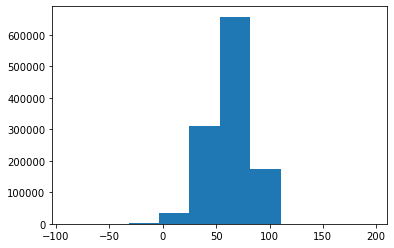

In [199]:
plt.hist(df2.Temp_F)  # fill in with median
df2['Temp_F'].fillna(df2['Temp_F'].median(), inplace=True)
df2['Temp_F'].isnull().values.sum()

0

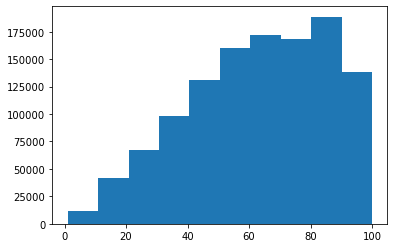

In [200]:
plt.hist(df2.Humidity_percent)  # fill in with median
df2['Humidity_percent'].fillna(df2['Humidity_percent'].median(), inplace=True)
df2['Humidity_percent'].isnull().values.sum()

0

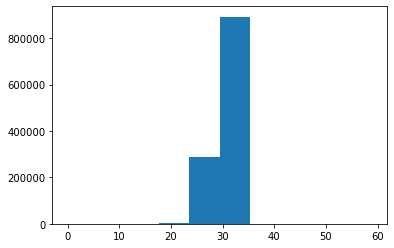

In [201]:
plt.hist(df2.Pressure_in) # fill in with median
df2['Pressure_in'].fillna(df2['Pressure_in'].median(), inplace=True)
df2['Pressure_in'].isnull().values.sum()

0

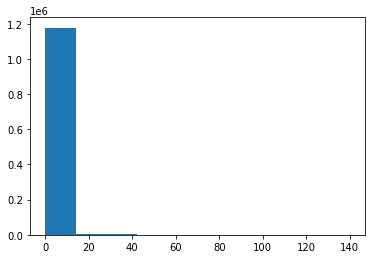

In [202]:
plt.hist(df2.Visibility_mi) # fill in with median
df2['Visibility_mi'].fillna(df2['Visibility_mi'].median(), inplace=True)
df2['Visibility_mi'].isnull().values.sum()

0

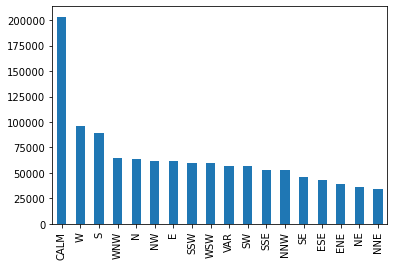

In [203]:
df2['Wind_Direction'].value_counts().plot(kind='bar') # fill in with CALM
df2['Wind_Direction'].fillna('CALM', inplace=True)
df2['Wind_Direction'].isnull().values.sum()

0

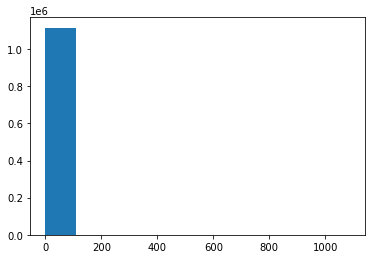

In [204]:
plt.hist(df2.Wind_Speed_mph)  # fill in with median
df2['Wind_Speed_mph'].fillna(df2['Wind_Speed_mph'].median(), inplace=True)
df2['Wind_Speed_mph'].isnull().values.sum()

0

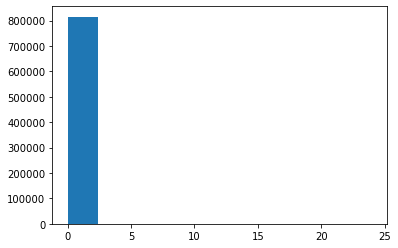

In [205]:
plt.hist(df2.Precipitation_in)  # fill in with median
df2['Precipitation_in'].fillna(df2['Precipitation_in'].median(), inplace=True)
df2['Precipitation_in'].isnull().values.sum()

## For Sunrise_Sunset missing value, fill in based on accident timestamp

In [206]:
time5 = '05::00::00'
start_day = datetime.strptime(time5, '%H::%M::%S').time()
print(start_morning)

time6 = '17::00::00'
end_day = datetime.strptime(time6, '%H::%M::%S').time()

day = []


for time in df2['Start_Time']:
    time = time.time()
    if time >= start_day and time <= end_day:
        day.append('Day')
        #print(time)
    else:
        day.append('Night')

print(day[0:50])
len(day)

07:00:00
['Night', 'Day', 'Day', 'Day', 'Day', 'Day', 'Day', 'Day', 'Day', 'Day', 'Day', 'Night', 'Night', 'Night', 'Night', 'Night', 'Night', 'Night', 'Night', 'Day', 'Day', 'Day', 'Day', 'Day', 'Day', 'Day', 'Day', 'Day', 'Day', 'Day', 'Day', 'Day', 'Day', 'Day', 'Night', 'Night', 'Night', 'Night', 'Day', 'Day', 'Day', 'Day', 'Day', 'Day', 'Day', 'Day', 'Day', 'Day', 'Day', 'Day']


1184957

In [207]:
df2['Day_night_calc'] = day

In [208]:
df2['Sunrise_Sunset'].fillna(df2['Day_night_calc'], inplace=True)

In [209]:
df2.Sunrise_Sunset.describe()

count     1184957
unique          2
top           Day
freq       829944
Name: Sunrise_Sunset, dtype: object

In [210]:
df2['Sunrise_Sunset'].isnull().values.sum()

0

In [211]:
df2 = df2.drop(columns = ['Day_night_calc','Wind_Chill_F'], axis = 1)

In [212]:
df2.head()

,Severity,Start_Time,City,State,Weather_Timestamp,Temp_F,Humidity_percent,Pressure_in,Visibility_mi,Wind_Direction,Wind_Speed_mph,Precipitation_in,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Street,Cross_street,CLOUDY,RAIN,FOG,THUNDER,WINDY,SNOW,SLEET,DUST,TORNADO,HAIL,Non_workday,Work_day,Rush_hour
0,3,2016-02-08 00:37:08,Dublin,OH,2016-02-08 00:53:00,42.1,58.0,29.76,10.0,SW,10.4,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,OUTERBELT E,SAWMILL RD,0,1,0,0,0,0,0,0,0,0,0,1,0
1,2,2016-02-08 05:56:20,Dayton,OH,2016-02-08 05:58:00,36.9,91.0,29.68,10.0,CALM,7.0,0.02,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,I-70 E,OH-4,0,1,0,0,0,0,0,0,0,0,0,1,0
2,2,2016-02-08 06:15:39,Cincinnati,OH,2016-02-08 05:53:00,36.0,97.0,29.70,10.0,CALM,7.0,0.02,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,I-75 S,I-71,1,0,0,0,0,0,0,0,0,0,0,1,0
3,2,2016-02-08 06:51:45,Akron,OH,2016-02-08 06:54:00,39.0,55.0,29.65,10.0,CALM,7.0,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,I-77 N,DART AVE,1,0,0,0,0,0,0,0,0,0,0,1,0
4,3,2016-02-08 07:53:43,Cincinnati,OH,2016-02-08 07:53:00,37.0,93.0,29.69,10.0,WSW,10.4,0.01,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,I-75 S,MITCHELL AVE,0,1,0,0,0,0,0,0,0,0,0,1,1


## Check numerical column range by boxplot 

Temp_F
Humidity_percent
Pressure_in
Visibility_mi
Wind_Speed_mph
Precipitation_in


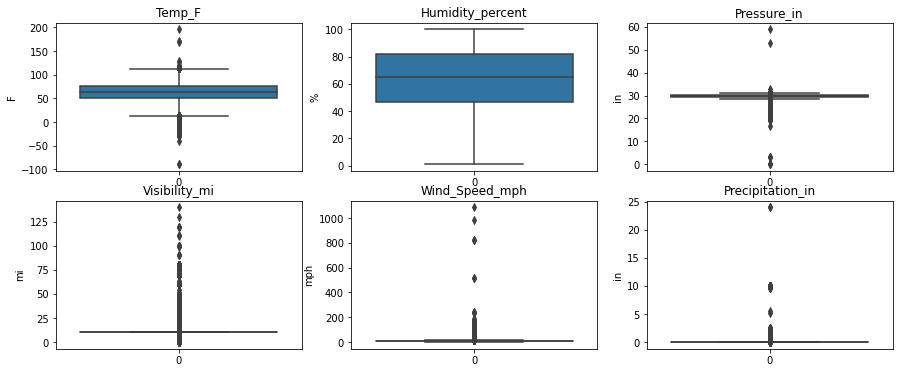

In [213]:
num_var = ['Temp_F','Humidity_percent','Pressure_in','Visibility_mi',
           'Wind_Speed_mph','Precipitation_in']

yaxis = ['F','%','in','mi','mph','in']

fig, axes = plt.subplots(2, 3, figsize=(15,6))
i = 0
j = 0
k = 0
    
for i in range(0,2):
    for j in range(0,3):
        xlabel = num_var[k]
        ylabel = yaxis[k]
        sns.boxplot(ax = axes[i,j], data = df2[num_var[k]])
        axes[i,j].set_title(xlabel)
        axes[i,j].set_ylabel(ylabel)
        print(num_var[k])
        k += 1
        j += 1
    i += 1

### Temp_F and Wind_Speed_mph is out of normal range. Remove outliers

In [241]:
pTemp_bottom = df2['Temp_F'].quantile(0.000005) # bottom quantile
print(pTemp_bottom)

pTemp_top = df2['Temp_F'].quantile(0.999995) # top quantile
print(pTemp_top)

df2['Temp_F'].clip(pTemp_bottom, pTemp_top, inplace=True)

-27.9
118.4


In [242]:
pWindSpeed_bottom = df2['Wind_Speed_mph'].quantile(0.00001) # bottom quantile
print(pWindSpeed_bottom)

pWindSpeed_top = df2['Wind_Speed_mph'].quantile(0.99999) # top quantile
print(pWindSpeed_top)

df2['Wind_Speed_mph'].clip(pWindSpeed_bottom, pWindSpeed_top, inplace=True)

0.0
169.88759599998593


Temp_F
Humidity_percent
Pressure_in
Visibility_mi
Wind_Speed_mph
Precipitation_in


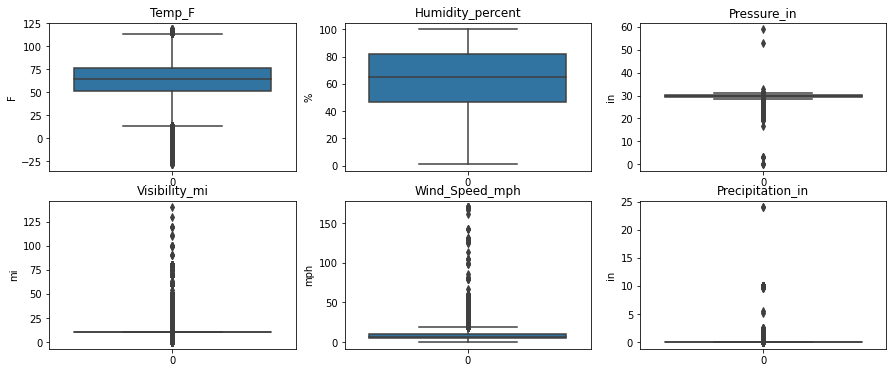

In [243]:
num_var = ['Temp_F','Humidity_percent','Pressure_in','Visibility_mi',
           'Wind_Speed_mph','Precipitation_in']

yaxis = ['F','%','in','mi','mph','in']

fig, axes = plt.subplots(2, 3, figsize=(15,6))
i = 0
j = 0
k = 0
    
for i in range(0,2):
    for j in range(0,3):
        xlabel = num_var[k]
        ylabel = yaxis[k]
        sns.boxplot(ax = axes[i,j], data = df2[num_var[k]])
        axes[i,j].set_title(xlabel)
        axes[i,j].set_ylabel(ylabel)
        print(num_var[k])
        k += 1
        j += 1
    i += 1

## Remove rows with missing data in 'City'

In [244]:
df2 = df2[df2['City'].notna()]

In [246]:
df2['City'].isnull().values.sum()

0

In [247]:
df2.shape

(1184871, 41)

## Group severity into two groups 

In [249]:
# severity_simple is binary
# Severity 1 and 2 have value 0
# Severity 3 and 4 have value 1

severity_simple = []
for item in df2['Severity']:
    if item == 1 or item == 2:
        severity_simple.append(0)
    else:
        severity_simple.append(1)

In [250]:
df2['Severity_simple'] = severity_simple

In [251]:
df2.head()

,Severity,Start_Time,City,State,Weather_Timestamp,Temp_F,Humidity_percent,Pressure_in,Visibility_mi,Wind_Direction,Wind_Speed_mph,Precipitation_in,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Street,Cross_street,CLOUDY,RAIN,FOG,THUNDER,WINDY,SNOW,SLEET,DUST,TORNADO,HAIL,Non_workday,Work_day,Rush_hour,Severity_simple
0,3,2016-02-08 00:37:08,Dublin,OH,2016-02-08 00:53:00,42.1,58.0,29.76,10.0,SW,10.4,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,OUTERBELT E,SAWMILL RD,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,2,2016-02-08 05:56:20,Dayton,OH,2016-02-08 05:58:00,36.9,91.0,29.68,10.0,CALM,7.0,0.02,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,I-70 E,OH-4,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,2,2016-02-08 06:15:39,Cincinnati,OH,2016-02-08 05:53:00,36.0,97.0,29.70,10.0,CALM,7.0,0.02,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,I-75 S,I-71,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2,2016-02-08 06:51:45,Akron,OH,2016-02-08 06:54:00,39.0,55.0,29.65,10.0,CALM,7.0,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,I-77 N,DART AVE,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,3,2016-02-08 07:53:43,Cincinnati,OH,2016-02-08 07:53:00,37.0,93.0,29.69,10.0,WSW,10.4,0.01,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,I-75 S,MITCHELL AVE,0,1,0,0,0,0,0,0,0,0,0,1,1,1


## Output to csv

In [253]:
df2.to_csv('national_accidents_attributes_adjusted.csv', index=False)